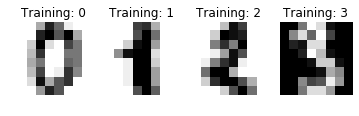

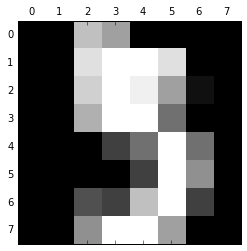

In [2]:
# Support Vector Machines (SVMs) belong to the discriminant model family: they try to find a combination of samples to build
# a plane maximizing the margin between the two classes. 

# This script illustrates the usage of SVMs for image classification. 

%matplotlib inline
# import necessary libraries and specify that graphs should be plotted inline. 
from sklearn import datasets
import matplotlib.pyplot as plt

# load dataset
# This method will Load and return the digits dataset (classification).
digits = datasets.load_digits()

# The data that we are interested in is made of 8x8 images of digits, let's
# have a look at the first 3 images, stored in the `images` attribute of the
# dataset. 
# If we were working from image files, we could load them using
# pylab.imread. 
# Note that each image must have the same size. For these images, we know which digit they represent: 
# it is given in the 'target' of the dataset.
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

# Visualize one instance of the data set
plt.gray() 
plt.matshow(digits.images[5]) 
plt.show() 

In [3]:
# When the data is not initially in the (n_samples, n_features) shape, it needs to be preprocessed in order to
# be used by scikit-learn.
# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

X, y = data, digits.target

# split the data set, this is an alternative approach
splitpoint = int(n_samples / 2)
X_train, X_test = X[:splitpoint], X[splitpoint:]
y_train, y_test = y[:splitpoint], y[splitpoint:]

In [4]:
## Create a classifier: a support vector classifier
from sklearn import svm
classifier = svm.SVC(gamma=0.001)
# Regularization is set by the C parameter: a small value for C means the margin is calculated using many or all of the 
# observations around the separating line (more regularization);
# a large value for C means the margin is calculated on observations close to the separating line (less regularization).

# Hyper-parameters of an estimator can be updated after it has been constructed via the
# sklearn.pipeline.Pipeline.set_params method. 

# train the classifier on the training set
classifier = svm.SVC().fit(X_train, y_train)

In [5]:
## Now predict the value of the digit on the test set:
from sklearn import metrics

# generate predictions
predicted = classifier.predict(X_test)
actual = y_test # just for clarity, actual = digits.target[n_samples / 2:] = y_test

# Build a text report showing the main classification metrics
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(actual, predicted)))

# Compute confusion matrix to evaluate the accuracy of a classification
print("Confusion matrix:\n%s" % metrics.confusion_matrix(actual, predicted))
# Wikipedia entry of confusion matrix: https://en.wikipedia.org/wiki/Confusion_matrix

Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
             precision    recall  f1-score   support

          0       1.00      0.43      0.60        88
          1       1.00      0.55      0.71        91
          2       1.00      0.34      0.50        86
          3       1.00      0.59      0.74        91
          4       1.00      0.29      0.45        92
          5       0.14      1.00      0.25        91
          6       1.00      0.36      0.53        91
          7       1.00      0.28      0.44        89
          8       1.00      0.01      0.02        88
          9       1.00      0.09      0.16        92

avg / total       0.91      0.40      0.44       899


Confusion matrix:
[[38  0  0  0  0 50  0  0  0  0]
 [ 0 50  0  0  0 41  0  0  0  0]
 [ 0  0 29  0 

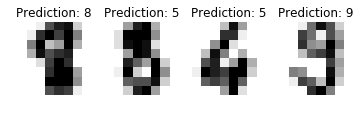

In [6]:
## Error analysis

# examine specific cases (actual vs predicted values)
images_and_predictions = list(zip(digits.images[splitpoint:], predicted))
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(2, 4, index + 5)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)

plt.show()

In [7]:
# In this example we set the value of gamma manually. 
# It is possible to automatically find good values for the parameters by using tools such as grid search and cross validation.